In [1]:
# from Mastering matplotlib Chapter 5 (slightly modified - moved all to notebook by removing ./lib/topo.py)
# note use of backend

import collections
import matplotlib as mpl                                                                                                                  
import numpy as np                                                                                                                        
from scipy import interpolate 
from matplotlib import pyplot as plt

plt.switch_backend('nbAgg')
                                                                                                                                          
                                                                                                                                          
snow = "#eeeeee"                                                                                                                          
mountains = "#aa8052"                                                                                                                     
hills = "#ccb688"                                                                                                                         
highlands = "#608350"                                                                                                                     
midlands = "#506d48"                                                                                                                      
lowlands = "#405644"                                                                                                                      
shallowsea = "#66a4c7"                                                                                                                    
sea = "#3681a5"                                                                                                                           
deepsea = "#39547c"                                                                                                                       
land_colors = [snow, mountains, hills,                                                                                                    
               highlands, midlands, lowlands,                                                                                             
               shallowsea, sea, deepsea]                                                                                                  
land_colors.reverse()                                                                                                                     
land_cmap = mpl.colors.LinearSegmentedColormap.from_list(                                                                                 
                "land", land_colors, N=16)                                                                                                
                                                                                                                                          
                                                                                                                                          
def make_land_map(xrange, yrange, seed):                                                                                                  
    (xmin, xmax) = xrange                                                                                                                 
    (ymin, ymax) = yrange                                                                                                                 
    np.random.seed(seed)                                                                                                                  
    x, y, z = np.random.random((3, 10))                                                                                                   
    # Interpolate these onto a regular grid                                                                                               
    xi, yi = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                                                     
    interpolation = interpolate.Rbf(x, y, z, function="linear")                                                                           
    zi = 3200 * interpolation(xi, yi) + 1000                                                                                              
    coords = collections.OrderedDict([("x", xi), ("y", yi), ("z", zi)])                                                                   
    (dy, dx) = np.gradient(-zi.T)                                                                                                         
    gradient = collections.OrderedDict([("dy", dy), ("dx", dx)])                                                                          
    return (coords, gradient)  

class TopoFlowMap:
             def __init__(self, xrange=None, yrange=None, seed=1):
                 self.xrange = xrange or (0,1)
                 self.yrange = yrange or (0,1)
                 self.seed = seed
                 (self.figure, self.axes) = plt.subplots(
                    figsize=(12,8))
                 self.axes.set_aspect(1)
                 self.colorbar = None
                 self.update()

             def get_ranges(self, xrange, yrange):
                 if xrange:
                     self.xrange = xrange
                 if yrange:
                     self.yrange = yrange
                 return (xrange, yrange)

             def get_colorbar_axes(self):
                 colorbar_axes = None
                 if self.colorbar:
                     colorbar_axes = self.colorbar.ax
                     colorbar_axes.clear()
                 return colorbar_axes

             def get_filled_contours(self, coords):
                 return self.axes.contourf(
                    cmap=land_cmap, *coords.values())

             def update_contour_lines(self, filled_contours):
                 contours = self.axes.contour(
                    filled_contours, colors="black", linewidths=2)
                 self.axes.clabel(
                    contours, fmt="%d", colors="#330000")

             def update_water_flow(self, coords, gradient):
                 self.axes.streamplot(
                     coords.get("x")[:,0],
                     coords.get("y")[0,:],
                     gradient.get("dx"),
                     gradient.get("dy"),
                     color="0.6",
                     density=1,
                     arrowsize=2)

             def update_labels(self):
                 self.colorbar.set_label("Altitude (m)")
                 self.axes.set_title(
                    "Water Flow across Land Gradients", fontsize=20)
                 self.axes.set_xlabel("$x$ (km)")
                 self.axes.set_ylabel("$y$ (km)")

             def update(self, xrange=None, yrange=None):
                 (xrange, yrange) = self.get_ranges(xrange, yrange)
                 (coords, grad) = make_land_map(
                    self.xrange, self.yrange, self.seed)
                 self.axes.clear()
                 colorbar_axes = self.get_colorbar_axes()
                 filled_contours = self.get_filled_contours(coords)
                 self.update_contour_lines(filled_contours)
                 self.update_water_flow(coords, grad)
                 self.colorbar = self.figure.colorbar(
                    filled_contours, cax=colorbar_axes)
                 self.update_labels()
                    
class TopoFlowMapManager:
         def __init__(self, xrange=None, yrange=None, seed=1):
             self.map = TopoFlowMap(xrange, yrange, seed)
             _ = self.map.figure.canvas.mpl_connect(
                 'button_release_event',
                 self.handle_pan_zoom_release)

         def start(self):
             plt.show()

         def handle_pan_zoom_release(self, event):
             if event.canvas.toolbar.mode != "pan/zoom":
                 return
             self.map.update(event.inaxes.get_xlim(),
                             event.inaxes.get_ylim())
             event.canvas.draw()

<IPython.core.display.Javascript object>


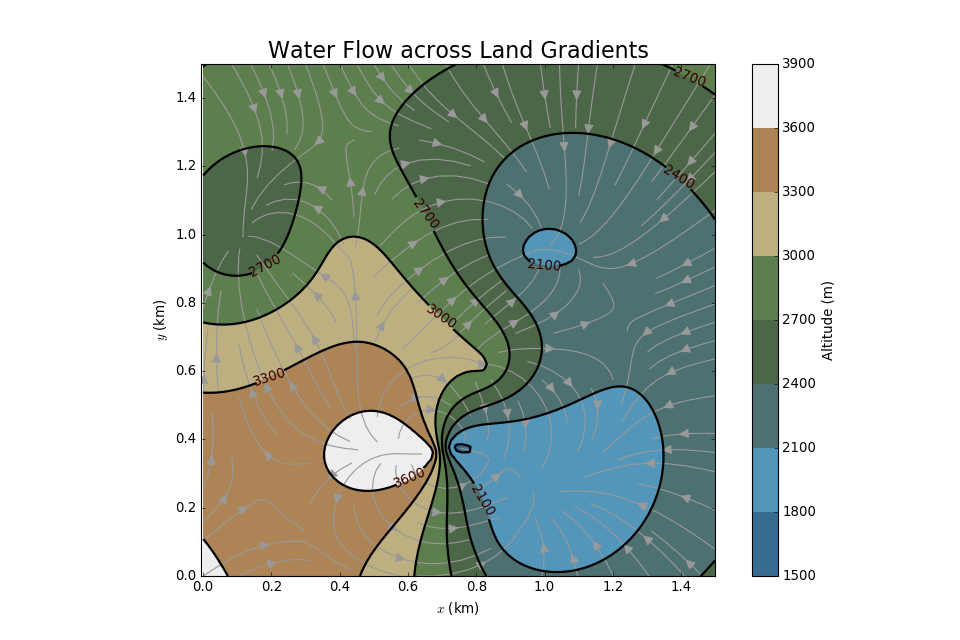

In [2]:
tfmm = TopoFlowMapManager(xrange=(0,1.5), yrange=(0,1.5), seed=1732)
tfmm.start()